This notebook aims to reproduce and compare the results from the publication "Simulation of a Brownian particle in an optical trap" (2013, G.Volpe and G.Volpe). The same physical parameters and numerical values will be used.


I. White noise
1. The white noise function is described by two properties :
$$ <W(t)> = 0 $$ 
$$ <W(t)²> = 1 $$
$$ <W(t_1)W(t_2)> = 0  

2. Random Walk :
The position of a particle in a free random walk is described by :
$$ \dot x = W(t) \space (1)$$ 
In a finite difference approach we describe W(t) as a discrete sequence of random values $W_i$ with 0 mean.
In order to have a variance of $W_i$ of $\frac{1}{\Delta t}$ we set :
$$ \frac{<(W_i \Delta t )²>}{\Delta t} = 1 \space (2)$$
In Python we can generate the random sequence of $w_i$ using the python gaussian function and setting the mean to 0 and variance to 1.
The equation (1) can be written in the finite difference as :
$$ \frac {x_i - x_{i-1}}{\Delta t} = \frac{w_i}{\sqrt{\Delta t}} \space(3)$$
$$ x_i = x_{i-1} + w_i \sqrt{\Delta t} \space(4)$$

Examples of free diffusing trajectories using different values of $\Delta t$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
# Generating the random sequence

def generate_seq(dt,N):
    standard_deviation = 1 #(1/(2*np.sqrt(dt)))
    W_seq = np.array(np.random.normal(0,standard_deviation,N))
    return W_seq

print(np.std(generate_seq(0.5,500000)),1)

1.0004446566646152 1


Comparing the standard deviation over 5e5 random gaussian number with the actual sd in entry of the function.

In [4]:
# Proceed Finite difference

def walk(duration,dt):
    N = int(duration/dt) # Number of step
    x = 0
    positions = []
    W_seq = np.array(generate_seq(dt,N))
    for i in range(N):
        positions.append(x)
        x += W_seq[i]*np.sqrt(dt)
    return np.array(positions)
    

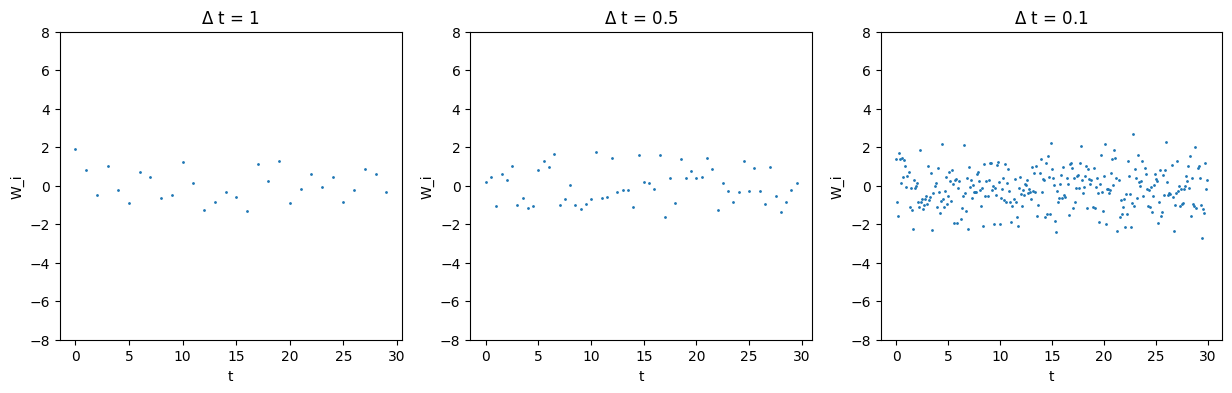

In [5]:
# Plot:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15, 4))

t1 = np.arange(0,30,1)
x1 = np.array(generate_seq(1,30))
ax1.scatter(t1,x1,s=1)
ax1.set_title('$\Delta$ t = 1')
ax1.set_ylim(-8,8)
ax1.set_xlabel('t')
ax1.set_ylabel('W_i')

t2 = np.arange(0,30,0.5)
x2 =np.array(generate_seq(0.5,60))
ax2.scatter(t2,x2,s=1)
ax2.set_title('$\Delta$ t = 0.5')
ax2.set_ylim(-8,8)
ax2.set_xlabel('t')
ax2.set_ylabel('W_i')

t3 = np.arange(0,30,0.1)
x3 = np.array(generate_seq(0.1,300))
ax3.scatter(t3,x3,s=1)
ax3.set_title('$\Delta$ t = 0.1')
ax3.set_ylim(-8,8)
ax3.set_xlabel('t')
ax3.set_ylabel('W_i')

plt.show()
plt.show()

Now we will compute the standard deviation by averaging the standard deviation over 10000 trajectories
$$ V = <x²> - <x>² $$

In [6]:
def mean_sd(nb_ite,dt):
    duration = 30
    nb_tstep = int(duration/dt)
    standard_deviation = np.zeros(nb_tstep)
    mean_traj = np.zeros(nb_tstep)
    matrix = []
    for i in range(nb_ite):
        # generate for each iteration a random_walk 
        trajectory = walk(duration,dt)
        matrix.append(trajectory)
    matrix = np.array(matrix)
    for j in range(nb_tstep):
        # for each column (time_step) mean and sd
        mean_traj[j] = np.mean(matrix[:,j])
        standard_deviation[j] += np.std(matrix[:,j])
        total = np.array(mean_traj) + np.array(standard_deviation)
    return total

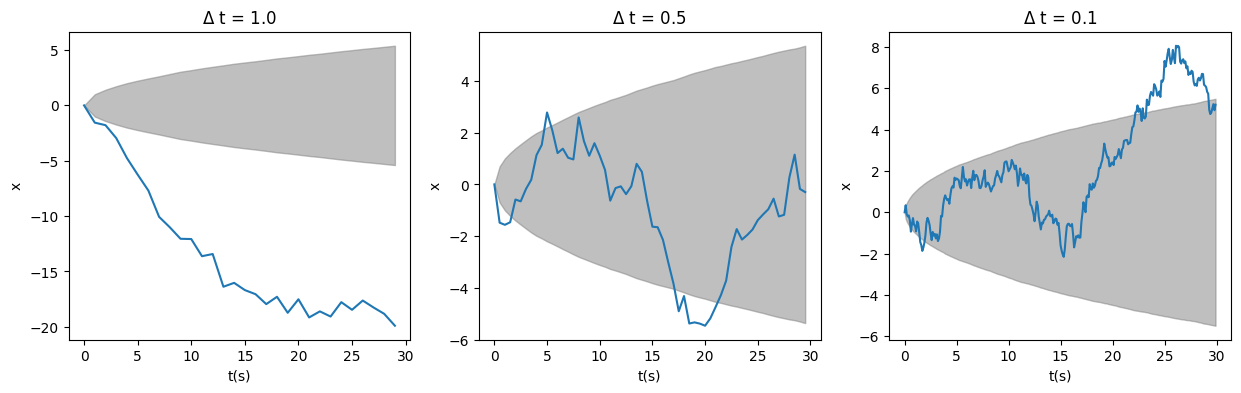

In [7]:
    

# Ploting the standard deviations
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15, 4))
sd1 = mean_sd(10000,1.0)
t1 = np.arange(0,30,1)
x1 = walk(30,1.0)
ax1.plot(t1,x1)
ax1.fill_between(t1, sd1, -sd1, color='gray', alpha=0.5, label='Shaded Area')
ax1.set_xlabel('t(s)')
ax1.set_ylabel('x')
ax1.set_title('$\Delta$ t = 1.0')

sd2 = mean_sd(10000,0.5)
t2 = np.arange(0,30,0.5)
x2 = walk(30,0.5)
ax2.plot(t2,x2)
ax2.fill_between(t2, sd2, -sd2, color='gray', alpha=0.5, label='Shaded Area')
ax2.set_xlabel('t(s)')
ax2.set_ylabel('x')
ax2.set_title('$\Delta$ t = 0.5')

sd3 = mean_sd(10000,0.1)
t3 = np.arange(0,30,0.1)
ax3.fill_between(t3, sd3, -sd3, color='gray', alpha=0.5, label='Shaded Area')
x3 = walk(30,0.1)
ax3.plot(t3,x3)
ax3.set_xlabel('t(s)')
ax3.set_ylabel('x')
ax3.set_title('$\Delta$ t = 0.1')
plt.show()


Averaging many trajectories and than taking the variance of it seems to be the wrong way of proceeding because we set the mean of our random sequence at 0 (definition of a Brownian walker). So as expected the variance seems pretty low. I tryed anyway because the formulation in the publication was unclear : 

"which represent the variance around the mean
position of the freely diffusing random walker obtained by
averaging over 10,000 trajectories, are roughly the same, independent of Dt. (The small differences are due to the finite
number of trajectories used in the averaging.)"

And :

"their statistical properties do not change, as can be
seen by comparing the shaded areas, which show the regions within one standard deviation of the mean of 10,000 realizations."



Auto correlation function :
$$C_{v,n} = \overline{v_{i+n}v_i}$$
with the velocity $v_i = (x_{i+1} - x_{i})/\Delta t$

In [8]:
# Parameters
T_K = 300
k_b = 1.3806452e-23
R_m = 1e-6
m_kg = 1.1e-14 
viscosity_NS_m2 = 0.001
load = 6*np.pi*viscosity_NS_m2*R_m 
tau = m_kg/load
diffusion = k_b*T_K/load
dt_s = 10e-9  
print(tau)


5.83568124670283e-07


In [9]:
def walk_diffusion(N,w):
    x = np.zeros(N)
    for i in range(1,N):
        x[i] = x[i-1] + np.sqrt(2*diffusion*dt_s)*w[i]
    return x

In [10]:
def walk_inertia(N,w):
    x = np.zeros(N)
    # As a term in [i-2] is needed to compute x[i] we must define x[1] first.
    x[1] = ((2+dt_s*(1/tau))/(1+dt_s*(1/tau)))*x[0] + (np.sqrt(2*k_b*T_K*load)/(m_kg*(1 + dt_s*(1/tau))))*dt_s**(3/2)*w[1]
    for i in range(2,N):
        x[i] = ((2+dt_s*(1/tau))/(1+dt_s*(1/tau)))*x[i-1] - (1/(1+dt_s*(1/tau)))*x[i-2] + (np.sqrt(2*k_b*T_K*load)/(m_kg*(1 + dt_s*(1/tau))))*dt_s**(3/2)*w[i]
    return x

58
5835


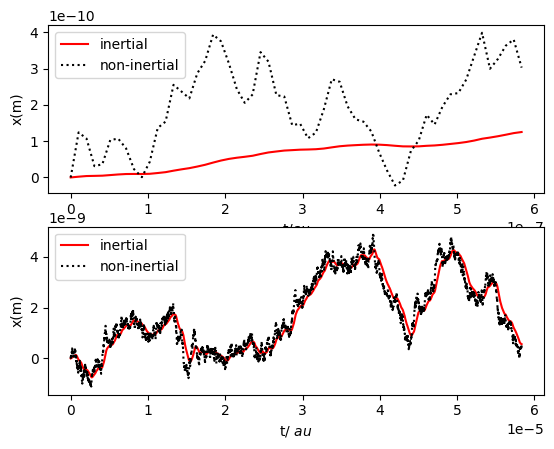

In [50]:
duration1 = tau
duration2 = 100*tau
N1 = int(duration1/dt_s)
print(N1)
N2 = int(duration2/dt_s)
print(N2)

w = generate_seq(dt_s,N2)

fig,(ax1,ax2) = plt.subplots(2,1)

t1 = np.linspace(0,duration1,N1)
ax1.plot(t1,walk_inertia(N1,w),color='red', label='inertial')
ax1.plot(t1,walk_diffusion(N1,w),color='black', linestyle='dotted', label='non-inertial')
ax1.set_xlabel('t/tau')
ax1.set_ylabel('x(m)')
ax1.legend()

t2 = np.linspace(0,duration2,N2)
ax2.plot(t2,walk_inertia(N2,w),color='red', label='inertial')
ax2.plot(t2,walk_diffusion(N2,w),color='black', linestyle='dotted', label='non-inertial')
ax2.set_xlabel('t/tau')
ax2.set_ylabel('x(m)')
ax2.legend()
plt.show()

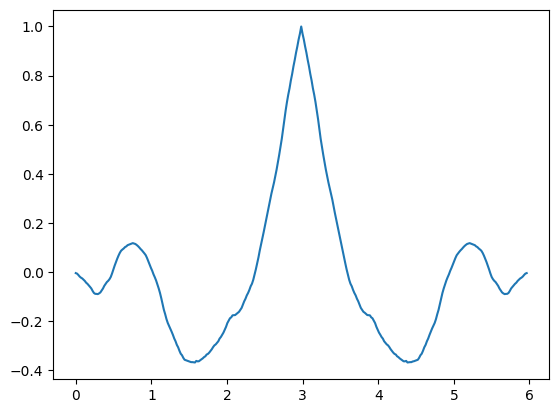

In [15]:
def auto_correlation():
    
    duration = 3*tau
    time_points = np.arange(0,duration,dt_s)
    N = len(time_points)
    w = generate_seq(dt_s,N)
    position = walk_inertia(N,w)
    velocities = np.diff(position, axis=0)
    centered_velocities = velocities - np.mean(velocities)

    autocorr = np.convolve(centered_velocities, centered_velocities[::-1], mode='full')
    autocorr /= autocorr[len(autocorr)//2]  # Normalize by autocorrelation at zero lag
    time_array = np.arange(int(len(autocorr)))*dt_s/tau
    return time_array,autocorr

x,C = auto_correlation()
plt.plot(x,C)
plt.show()

In [43]:
def mean_square_displacement(inertial):

    duration = 10*tau
    time_points = np.arange(0,duration,dt_s)
    N = len(time_points)
    
    w = generate_seq(dt_s,N)
    if inertial == True:
        position = walk_inertia(N,w)
    else :
        position = walk_diffusion(N,w)
    mean_array = []
    # Each iteration increase the difference
    centered_position = position - np.mean(position)
    for j in range(1,centered_position.shape[0]):
    
        M = np.mean((centered_position[:-j] - centered_position[j:])**2)
        mean_array.append(M)
    #Convert into a set of delta t
    time_array = np.arange(len(mean_array))*dt_s/tau
    return mean_array, time_array

/tmp/ipykernel_12862/1447104381.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,10e0)


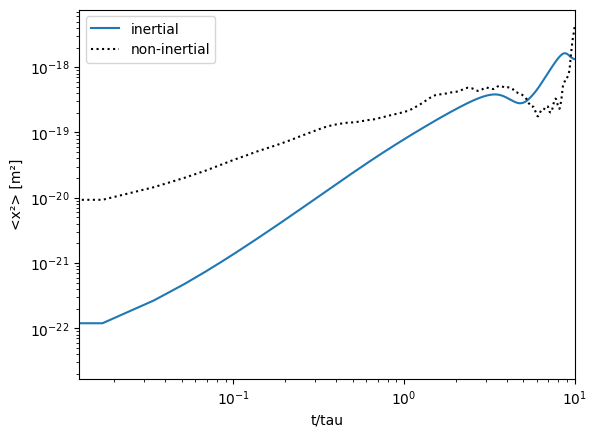

In [61]:
msd,t = mean_square_displacement(True)
msd2,t = mean_square_displacement(False)
plt.xlabel('t/tau')
plt.ylabel('<x²> [m²]')
plt.loglog(t,msd,label = 'inertial')
plt.loglog(t,msd2, color='black', linestyle='dotted',label = 'non-inertial')
plt.xlim(0,10e0)
plt.legend()
plt.show()

Optical trap :
